## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [4]:
# import models and fit

In [6]:
import pandas as pd
import numpy as np

# Load training and testing data
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")


y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("Data successfully loaded!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data successfully loaded!
X_train shape: (5372, 14)
X_test shape: (1344, 14)
y_train shape: (5372,)
y_test shape: (1344,)


In [9]:
import pandas as pd

y_train = pd.Series(y_train)  # Convert to a Pandas Series
print(y_train.unique())  # Now it should work

[7.000000e+05 3.150000e+05 3.500000e+05 6.414500e+05 2.310000e+05
 4.400000e+05 1.155000e+05 8.500000e+04 7.620000e+05 2.600000e+05
 4.850000e+05 1.870000e+05 8.100000e+05 1.949000e+05 4.100000e+05
 6.500000e+05 5.399000e+05 1.850000e+05 1.525000e+05 3.285000e+05
 1.125000e+06 1.699000e+05 2.500000e+06 5.425000e+05 2.349000e+05
 2.250000e+05 4.500000e+04 4.539900e+05 4.750000e+05 1.500000e+05
 5.050000e+05 3.700000e+05 1.450000e+05 4.200000e+05 6.256000e+05
 2.599000e+05 1.069000e+05 2.780000e+05 1.600000e+05 4.390000e+05
 7.500000e+05 2.849000e+05 7.400000e+06 8.910000e+05 3.220000e+05
 3.850000e+02 5.500000e+04 1.200000e+05 1.010000e+06 9.700000e+04
 6.750000e+05 3.710000e+05 1.470000e+05 2.800000e+05 9.500000e+05
 6.900000e+05 2.800000e+04 2.750000e+05 3.000000e+05 7.050000e+05
 8.800000e+04 1.410000e+06 3.300000e+05 2.500000e+03 7.450000e+05
 1.950000e+05 1.550000e+05 1.448150e+05 9.000000e+05 3.450000e+05
 9.250000e+04 2.399000e+05 5.000000e+05 2.500000e+05 3.240000e+05
 3.620000e

In [12]:
print(X_train.dtypes)

status          object
list_price     float64
year_built     float64
beds           float64
baths          float64
sqft           float64
lot_sqft       float64
garage         float64
type            object
city           float64
state          float64
postal_code      int64
latitude       float64
longitude      float64
dtype: object


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ["status", "type"]  # Columns that need encoding

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns & merge encoded ones
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

print("Final X_train shape:", X_train.shape)


Final X_train shape: (5372, 25)


In [14]:
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test = X_test.apply(pd.to_numeric, errors="coerce")

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5  # Root Mean Squared Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest Results:")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  MAE: {mae_rf:.2f}")
print(f"  R² Score: {r2_rf:.4f}")


Random Forest Results:
  RMSE: 33132.48
  MAE: 5350.79
  R² Score: 0.9935


In [17]:
import xgboost as xgb

# Initialize DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    "objective": "reg:squarederror",  # Use squared error for regression
    "eval_metric": "rmse"
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5  # Root Mean Squared Error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Results:")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  MAE: {mae_xgb:.2f}")
print(f"  R² Score: {r2_xgb:.4f}")


XGBoost Results:
  RMSE: 8396.56
  MAE: 4440.29
  R² Score: 0.9996


Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [ ]:
# gather evaluation metrics and compare results

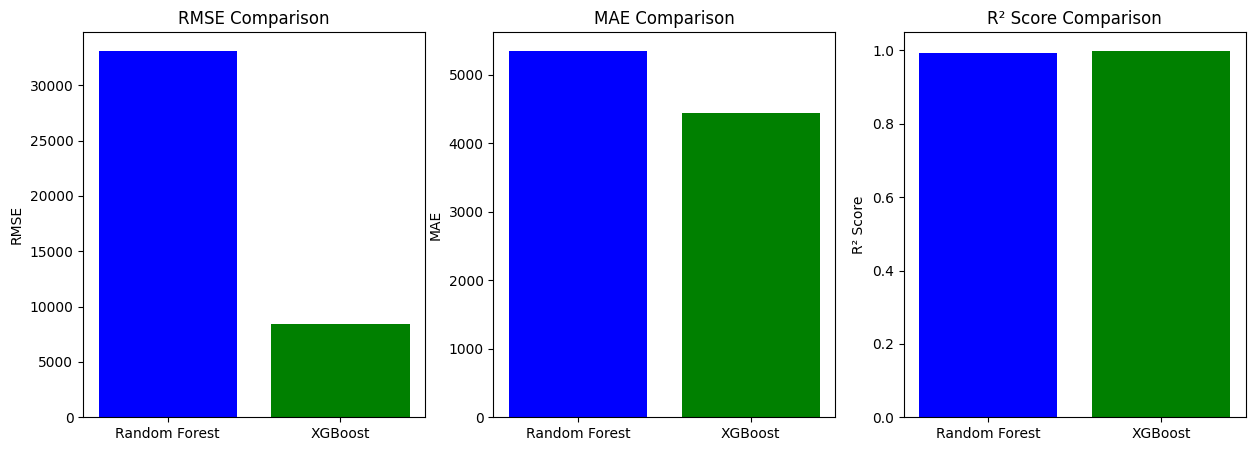

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Random Forest", "XGBoost"]
rmse_scores = [rmse_rf, rmse_xgb]
mae_scores = [mae_rf, mae_xgb]
r2_scores = [r2_rf, r2_xgb]

# Plot comparison
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# RMSE Comparison
ax[0].bar(models, rmse_scores, color=['blue', 'green'])
ax[0].set_title("RMSE Comparison")
ax[0].set_ylabel("RMSE")

# MAE Comparison
ax[1].bar(models, mae_scores, color=['blue', 'green'])
ax[1].set_title("MAE Comparison")
ax[1].set_ylabel("MAE")

# R2 Score Comparison
ax[2].bar(models, r2_scores, color=['blue', 'green'])
ax[2].set_title("R² Score Comparison")
ax[2].set_ylabel("R² Score")

plt.show()


## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable.



In [ ]:
# perform feature selection
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)